In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [3]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey=demo'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2022-01-28', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2022-01-28': {'1. open': '133.1900', '2. high': '134.5300', '3. low': '131.7900', '4. close': '134.5000', '5. volume': '5471497'}, '2022-01-27': {'1. open': '133.6600', '2. high': '134.7500', '3. low': '132.0800', '4. close': '132.5200', '5. volume': '5499566'}, '2022-01-26': {'1. open': '136.4700', '2. high': '137.0700', '3. low': '133.1300', '4. close': '134.2600', '5. volume': '8335992'}, '2022-01-25': {'1. open': '129.1400', '2. high': '137.3361', '3. low': '128.3000', '4. close': '136.1000', '5. volume': '19715698'}, '2022-01-24': {'1. open': '127.9900', '2. high': '129.1500', '3. low': '124.1930', '4. close': '128.8200', '5. volume': '13777648'}, '2022-01-21': {'1. open': '131.6500', '2. high': '131.8700', '3. low': '129.2700', '4. close': '129.3500', '5. 

In [4]:
data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [5]:
data['Meta Data']

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2022-01-28',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [6]:
data['Time Series (Daily)']

{'2022-01-28': {'1. open': '133.1900',
  '2. high': '134.5300',
  '3. low': '131.7900',
  '4. close': '134.5000',
  '5. volume': '5471497'},
 '2022-01-27': {'1. open': '133.6600',
  '2. high': '134.7500',
  '3. low': '132.0800',
  '4. close': '132.5200',
  '5. volume': '5499566'},
 '2022-01-26': {'1. open': '136.4700',
  '2. high': '137.0700',
  '3. low': '133.1300',
  '4. close': '134.2600',
  '5. volume': '8335992'},
 '2022-01-25': {'1. open': '129.1400',
  '2. high': '137.3361',
  '3. low': '128.3000',
  '4. close': '136.1000',
  '5. volume': '19715698'},
 '2022-01-24': {'1. open': '127.9900',
  '2. high': '129.1500',
  '3. low': '124.1930',
  '4. close': '128.8200',
  '5. volume': '13777648'},
 '2022-01-21': {'1. open': '131.6500',
  '2. high': '131.8700',
  '3. low': '129.2700',
  '4. close': '129.3500',
  '5. volume': '5906950'},
 '2022-01-20': {'1. open': '131.2600',
  '2. high': '132.8800',
  '3. low': '130.5705',
  '4. close': '130.8200',
  '5. volume': '5278244'},
 '2022-01-1

In [7]:
df = pd.DataFrame(data['Time Series (Daily)'])
df.head()

,2022-01-28,2022-01-27,2022-01-26,2022-01-25,2022-01-24,2022-01-21,2022-01-20,2022-01-19,2022-01-18,2022-01-14,2022-01-13,2022-01-12,2022-01-11,2022-01-10,2022-01-07,2022-01-06,2022-01-05,2022-01-04,2022-01-03,2021-12-31,2021-12-30,2021-12-29,2021-12-28,2021-12-27,2021-12-23,2021-12-22,2021-12-21,2021-12-20,2021-12-17,2021-12-16,2021-12-15,2021-12-14,2021-12-13,2021-12-10,2021-12-09,2021-12-08,2021-12-07,2021-12-06,2021-12-03,2021-12-02,...,1999-12-28,1999-12-27,1999-12-23,1999-12-22,1999-12-21,1999-12-20,1999-12-17,1999-12-16,1999-12-15,1999-12-14,1999-12-13,1999-12-10,1999-12-09,1999-12-08,1999-12-07,1999-12-06,1999-12-03,1999-12-02,1999-12-01,1999-11-30,1999-11-29,1999-11-26,1999-11-24,1999-11-23,1999-11-22,1999-11-19,1999-11-18,1999-11-17,1999-11-16,1999-11-15,1999-11-12,1999-11-11,1999-11-10,1999-11-09,1999-11-08,1999-11-05,1999-11-04,1999-11-03,1999-11-02,1999-11-01
1. open,133.1900,133.6600,136.4700,129.1400,127.9900,131.6500,131.2600,132.9000,132.9500,134.5500,133.9000,133.2500,130.5200,134.4700,134.9000,138.2000,138.3100,136.1000,134.0700,134.0000,133.7500,132.4000,131.6000,130.6300,130.0000,129.0600,127.6600,125.7200,125.8700,123.5100,123.8000,122.3500,123.7600,124.3000,122.1500,122.0000,120.4750,119.4000,117.3600,117.3700,...,109.5600,109.6900,109.1200,109.8700,108.5000,109.0600,110.6900,108.0000,107.7500,110.1900,108.1200,111.6200,120.5000,116.2500,117.0000,113.0000,109.8100,103.4400,102.5600,103.6900,104.9400,105.9400,105.0000,108.8100,105.5000,99.0000,94.0000,94.8700,94.6200,96.0000,96.0000,97.5000,94.6200,95.0600,90.5000,92.7500,94.4400,95.8700,96.7500,98.5000
2. high,134.5300,134.7500,137.0700,137.3361,129.1500,131.8700,132.8800,133.9000,133.8900,135.1400,136.0500,134.4700,133.2500,136.2000,135.6618,138.4099,142.2000,139.9500,136.2950,134.9900,134.3700,134.2100,133.2200,131.6500,130.9600,129.7900,129.3356,127.2000,128.6400,126.6399,124.8150,125.0300,124.3554,125.3300,123.9500,123.3800,122.0800,121.1500,119.3600,117.9800,...,110.7500,110.0000,110.4400,110.3100,110.1200,110.4400,111.0600,109.6900,107.9400,110.1900,112.7500,111.9400,122.1200,121.0000,119.1900,116.5000,112.8700,106.3100,104.4400,104.5000,104.9400,106.0000,105.0000,109.8700,108.4400,105.1200,98.2500,94.8700,95.0000,96.3700,96.2500,97.5000,97.0600,95.5000,93.9400,92.9400,94.4400,95.9400,96.8100,98.8100
3. low,131.7900,132.0800,133.1300,128.3000,124.1930,129.2700,130.5705,131.5000,131.7800,133.3000,133.5600,131.3700,127.9700,133.3800,133.5111,132.5100,137.8800,135.9000,133.6300,133.6100,133.3300,132.3000,131.5900,129.9500,129.5200,127.6000,127.6600,124.7000,125.2093,123.4750,122.1800,122.3000,120.7900,123.3600,121.7900,121.5200,120.0700,119.4000,117.3600,116.5600,...,109.0600,108.1200,108.1900,108.0000,108.0600,107.7500,108.6200,105.7500,104.5000,106.8700,106.5600,107.5600,112.2500,115.5000,115.4400,112.5000,107.9400,103.3700,102.2500,102.1200,103.3700,104.1200,101.8100,106.0000,104.4400,98.3700,93.5600,92.6200,93.0000,93.8700,93.0000,94.8700,94.1200,92.1200,90.5000,90.1900,90.0000,93.5000,93.6900,96.3700
4. close,134.5000,132.5200,134.2600,136.1000,128.8200,129.3500,130.8200,131.5800,132.9400,134.2100,134.7600,133.5900,132.8700,135.0300,134.8300,135.3400,138.2200,138.0200,136.0400,133.6600,133.9100,133.3500,132.6300,131.6200,130.6300,129.7500,128.9700,127.0600,127.4000,125.9300,123.1100,123.7600,122.5800,124.0900,123.5700,123.0200,121.5800,119.9100,118.8400,116.9000,...,109.8100,109.7500,108.6200,108.0000,110.1200,109.2000,110.0000,109.1900,107.0000,109.2500,109.7000,109.0000,113.3700,118.2800,116.6200,116.0000,111.8700,105.2700,103.4200,103.0600,104.1900,105.0000,104.5000,106.0600,107.8700,103.9400,98.0000,93.7500,94.6200,94.0600,95.8700,95.0000,97.0000,93.6200,93.9400,90.2500,91.5600,94.3700,94.8100,96.7500
5. volume,5471497,5499566,8335992,19715698,13777648,5906950,5278244,4099035,5236258,5310305,4868349,5352014,11081210,5432807,5238099,9908081,8956910,7300011,4610665,3315313,3158111,4239935,3447079,4294499,3649044,3923198,4855972,4941411,10382693

In [8]:
df1 = df.transpose()
df1.head()

,1. open,2. high,3. low,4. close,5. volume
2022-01-28,133.1900,134.5300,131.7900,134.5000,5471497
2022-01-27,133.6600,134.7500,132.0800,132.5200,5499566
2022-01-26,136.4700,137.0700,133.1300,134.2600,8335992
2022-01-25,129.1400,137.3361,128.3000,136.1000,19715698
2022-01-24,127.9900,129.1500,124.1930,128.8200,13777648


In [9]:
data = df1.iloc[::-1]
data.head()

,1. open,2. high,3. low,4. close,5. volume
1999-11-01,98.5000,98.8100,96.3700,96.7500,9551800
1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400
1999-11-03,95.8700,95.9400,93.5000,94.3700,10369100
1999-11-04,94.4400,94.4400,90.0000,91.5600,16697600
1999-11-05,92.7500,92.9400,90.1900,90.2500,13737600


In [10]:
data.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [11]:
data.rename(columns = {'1. open':'open', '2. high':'high',
                              '3. low':'low', '4. close':'close', '5. volume':'volume'}, inplace = True)

In [12]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [13]:
data.dtypes

open      object
high      object
low       object
close     object
volume    object
dtype: object

In [14]:
for column in data.columns:
  data[column] = data[column].astype(float)

In [15]:
data.dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

In [16]:
data.tail()

,open,high,low,close,volume
2022-01-24,127.99,129.1500,124.193,128.82,13777648.0
2022-01-25,129.14,137.3361,128.300,136.10,19715698.0
2022-01-26,136.47,137.0700,133.130,134.26,8335992.0
2022-01-27,133.66,134.7500,132.080,132.52,5499566.0
2022-01-28,133.19,134.5300,131.790,134.50,5471497.0


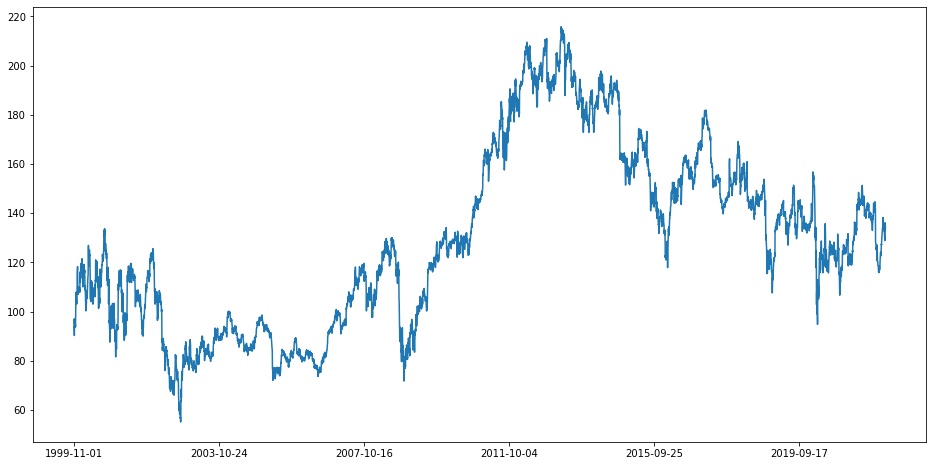

In [17]:
plt.figure(figsize=(16,8))
data['close'].plot()

In [18]:
data.isnull().any()

open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [19]:
data.shape

(5598, 5)

In [20]:
data.iloc[5326]

open          124.22
high          126.03
low           123.99
close         125.88
volume    3574696.00
Name: 2020-12-31, dtype: float64

In [21]:
X_train = data[:5237]
X_valid = data[5237:]

X_IBM_train = X_train.drop(['close'], axis=1)
y_IBM_train = X_train['close']
X_IBM_valid = X_valid.drop(['close'], axis=1)
y_IBM_valid = X_valid['close']
y_IBM_valid

2020-08-25    124.64
2020-08-26    124.17
2020-08-27    124.65
2020-08-28    125.07
2020-08-31    123.31
               ...  
2022-01-24    128.82
2022-01-25    136.10
2022-01-26    134.26
2022-01-27    132.52
2022-01-28    134.50
Name: close, Length: 361, dtype: float64

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(X_train_scaled)
X_valid_scaled = scaler.fit_transform(X_valid)
x_valid = pd.DataFrame(X_valid_scaled)

In [23]:
X_train_scaled

array([[0.27281777, 0.26451005, 0.26427101, 0.25931687, 0.22818678],
       [0.26192994, 0.25194724, 0.24755131, 0.24724694, 0.26606611],
       [0.25645492, 0.24648241, 0.24636596, 0.24450943, 0.2481139 ],
       ...,
       [0.42649163, 0.42298995, 0.42922204, 0.42356747, 0.05774357],
       [0.42530953, 0.41949874, 0.42610269, 0.42362969, 0.07783129],
       [0.43016238, 0.43567839, 0.43265332, 0.43930816, 0.09455137]])

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_IBM_train,y_IBM_train)

LinearRegression()

In [25]:
preds = model.predict(X_IBM_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_IBM_valid)-np.array(preds)),2)))
rms

0.6645810361422343

In [26]:
train_predict=model.predict(X_IBM_train)
test_predict=model.predict(X_IBM_valid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


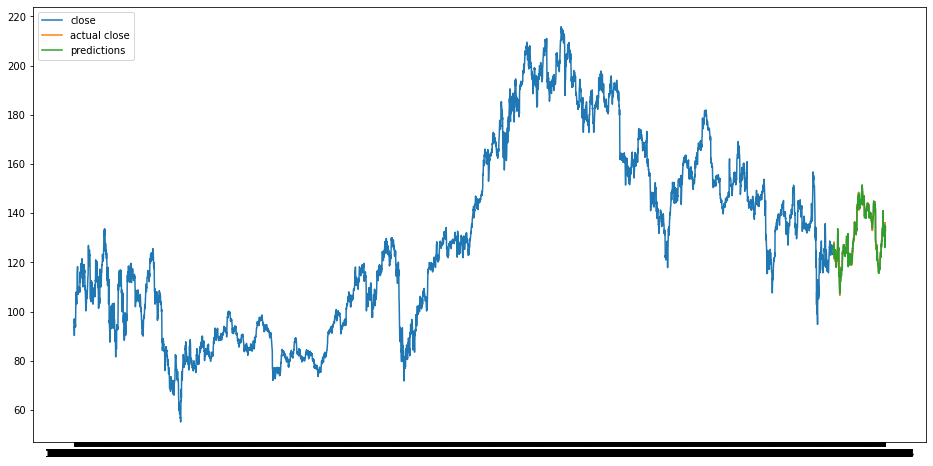

In [27]:
X_valid['Predictions'] = preds

plt.figure(figsize=(16,8))
plt.plot(data['close'])
plt.plot(X_valid[['close', 'Predictions']])
plt.legend(["close","actual close", "predictions"], loc ="upper left")

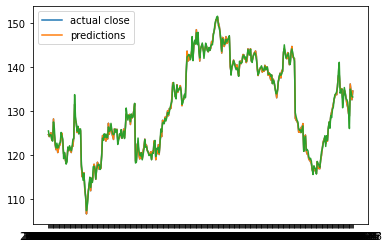

In [28]:
plt.plot(X_valid['close'])
plt.plot(X_valid[['close', 'Predictions']])
plt.legend(["actual close", "predictions"], loc ="upper left")

In [29]:
prediction = model.predict([[133.19,134.5300,131.790,5471497.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [30]:
data.iloc[-1]['close']

134.5

In [31]:
print(prediction)
error = (prediction - data.iloc[-1]['close'])/data.iloc[-1]['close']
print(error*100)

[133.14568061]
[-1.00692891]


In [33]:
#if data.iloc[-1]['close']

In [37]:
import pickle
with open('model.pickle', 'wb') as f:
  pickle.dump(model,f)

In [40]:
import json 
columns = {'data_columns' : [col.lower() for col in data.columns] }


with open("columns.json", "w") as f: 
  f.write(json.dumps(columns))